In [1]:
import yfinance as yf
import pandas as pd

ticker = yf.Ticker("EURUSD=X")
data = ticker.history(period = '1y',interval = '1d')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-11,1.173764,1.180498,1.172319,1.173778,0,0,0
2020-08-12,1.173985,1.181265,1.171303,1.173654,0,0,0
2020-08-13,1.179649,1.186400,1.179468,1.179380,0,0,0
2020-08-14,1.181893,1.183800,1.178467,1.181656,0,0,0
2020-08-17,1.185045,1.188072,1.183040,1.185255,0,0,0
...,...,...,...,...,...,...,...
2021-08-05,1.183992,1.185901,1.182984,1.183740,0,0,0
2021-08-06,1.183320,1.183572,1.175641,1.183572,0,0,0
2021-08-09,1.175088,1.177163,1.174178,1.174950,0,0,0


In [15]:
import math

def EMA(input_data,period_ema):
    
    alpha = 2/(1+period_ema)
    EMA = []
    
    i = 0
    ema = 0
    
    while i<period_ema:
        EMA.append(math.nan)
        i+=1
        
    while (i>=period_ema and i<len(input_data)):
        ema = alpha*input_data[i] + (1-alpha)*ema
        EMA.append(ema)
        i+=1
        
    return EMA

z = EMA(data.iloc[:,3],8)
len(z)

262

In [20]:
import math

def OSCAR1(input_data,period):
    
    i = 0
    
    OSCAR_A = []
    
    while i<period:
        OSCAR_A.append(math.nan)
        i+=1
   
    while (i>=period and i<len(input_data)):
        A = max(input_data[i-period:i])
        B = min(input_data[i-period:i])
        Oscar_rough = ((input_data[i]-B)/(A-B))*100
        OSCAR_A.append(Oscar_rough)
        i+=1
        
    return OSCAR_A
        

def OSCAR2(input_data,oscar_rough_data,period):
    
    i = 0
    
    OSCAR2 = []
    
    while i<period:
        OSCAR2.append(math.nan)
        i+=1
        
    while (i>=period and i<len(input_data)):
        A = max(input_data[i-period:i])
        B = min(input_data[i-period:i])
        
        if i==period:
            Oscar1 = 0
        else:
            Oscar1 = (oscar_rough_data[i-1]/3)*2
            
        Oscar = Oscar1 + (oscar_rough_data[i]/3)
        OSCAR2.append(Oscar)
        i+=1
        
    return OSCAR2


In [24]:
OSCAR_1 = OSCAR1(data.iloc[:,3],8)

OSCAR_2 = OSCAR2(data.iloc[:,3],OSCAR_1,8)

data['OSCAR Fast'] = EMA(OSCAR_1,8)
data['OSCAR Slow'] = EMA(OSCAR_2,8)
data.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,OSCAR Fast,OSCAR Slow
Date,,,,,,,,,
2020-08-11,1.173764,1.180498,1.172319,1.173778,0,0,0,NaN,NaN
2020-08-12,1.173985,1.181265,1.171303,1.173654,0,0,0,NaN,NaN
2020-08-13,1.179649,1.186400,1.179468,1.179380,0,0,0,NaN,NaN
2020-08-14,1.181893,1.183800,1.178467,1.181656,0,0,0,NaN,NaN
2020-08-17,1.185045,1.188072,1.183040,1.185255,0,0,0,NaN,NaN
2020-08-18,1.187931,1.196516,1.187536,1.187648,0,0,0,NaN,NaN
2020-08-19,1.194729,1.195457,1.189343,1.194786,0,0,0,NaN,NaN
2020-08-20,1.184175,1.186845,1.180652,1.184350,0,0,0,NaN,NaN
2020-08-21,1.187085,1.188637,1.175490,1.187366,0,0,0,14.420018,4.806673


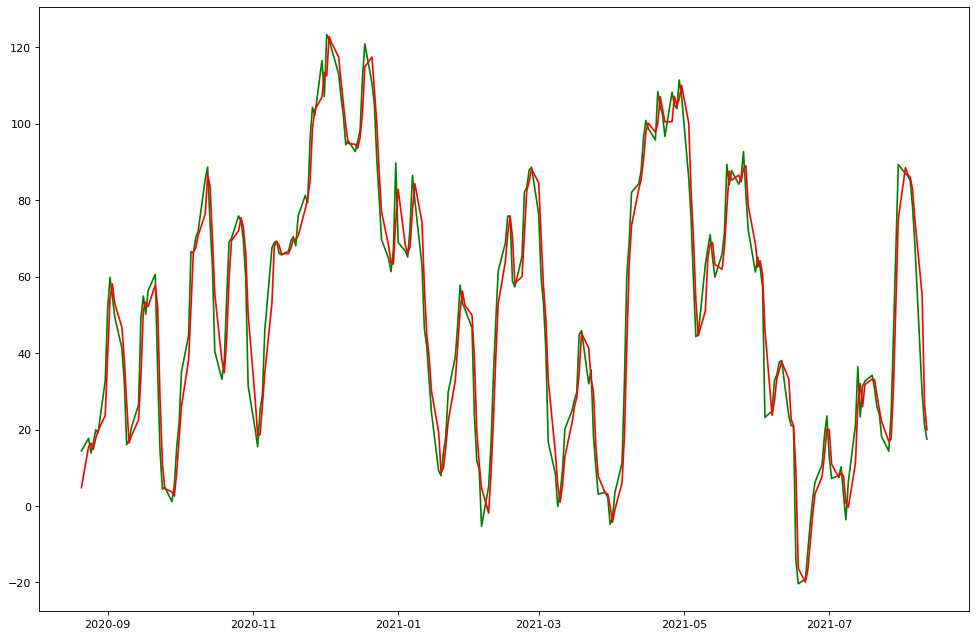

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

x = data['OSCAR Fast']
y = data['OSCAR Slow']

plt.plot(x,'g',y, 'r')

C:\Users\Priya Suresh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


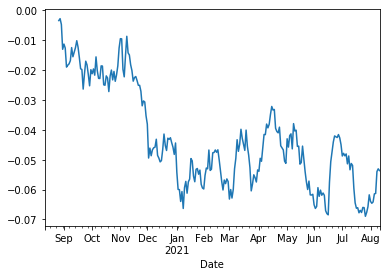

In [31]:
import numpy as np

data['Position'] = math.nan

for row in range(len(data)):
    
    if ((data['OSCAR Fast'].iloc[row] < data['OSCAR Slow'].iloc[row]) and
    (data['OSCAR Fast'].iloc[row-1] > data['OSCAR Slow'].iloc[row-1])):
        data['Position'].iloc[row] = -1
        
    if ((data['OSCAR Fast'].iloc[row] > data['OSCAR Slow'].iloc[row]) and
    (data['OSCAR Fast'].iloc[row-1] < data['OSCAR Slow'].iloc[row-1])):
        data['Position'].iloc[row] = 1
        

data['Position'].fillna(method='ffill',inplace=True)

data['Market Return'] = np.log(data['Close'] / data['Close'].shift(1))
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

data['Strategy Return'].cumsum().plot()